# Generate clustering plots with scanpy

In [1]:
from tkinter.messagebox import showerror
%load_ext autoreload
%autoreload 2

In [2]:
import scanpy as sc
from matplotlib import pyplot as plt
import seaborn as sns
import anndata as ad
from dataset_handler import load_h5ad_files, preprocess_pipeline

In [3]:
# Load the data
datapath = '../dataset/'
ad_LD, ad_DD = load_h5ad_files(datapath)
adata = ad.concat([ad_LD, ad_DD], join="inner")
filtered_adata = preprocess_pipeline(adata)

# Select an appropriate subset of genes
with open('geneswegener.txt') as f:
    genes = f.read().splitlines()

In [4]:
# Compile a fast t-sne representation
# Perform PCA to reduce dimensionality
sc.tl.pca(filtered_adata, n_comps=50)

# Perform t-SNE using the PCA results
sc.tl.tsne(filtered_adata, use_rep='X_pca', perplexity=30)

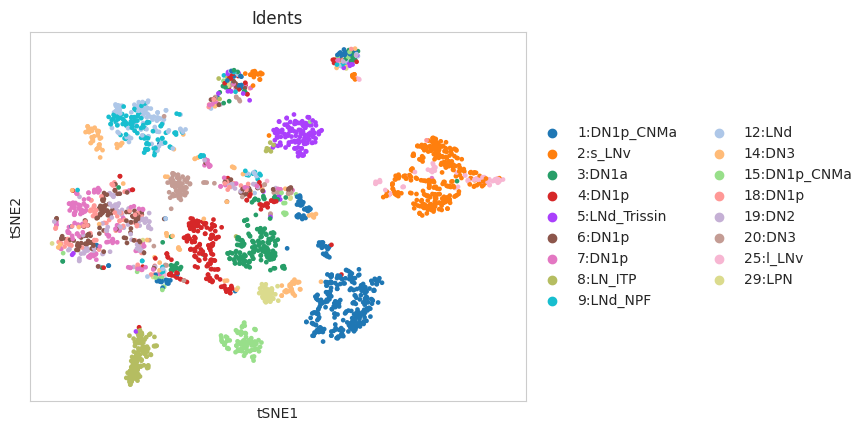

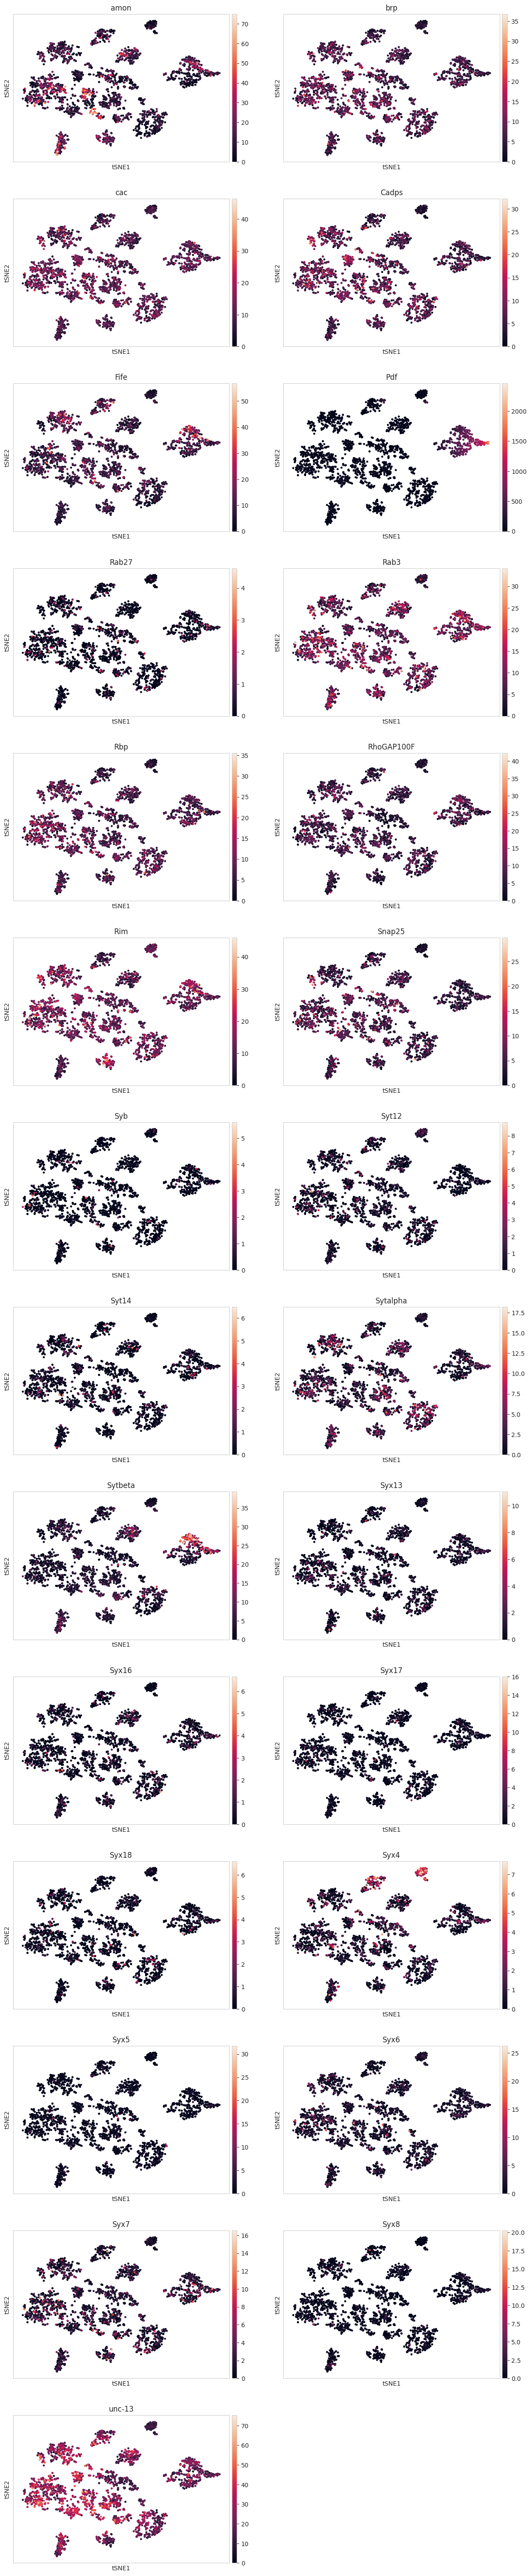

In [5]:
# Plot by cluster 
sc.pl.tsne(filtered_adata, color='Idents')

# Plot by gene
sc.pl.tsne(filtered_adata, color=genes, ncols=2)

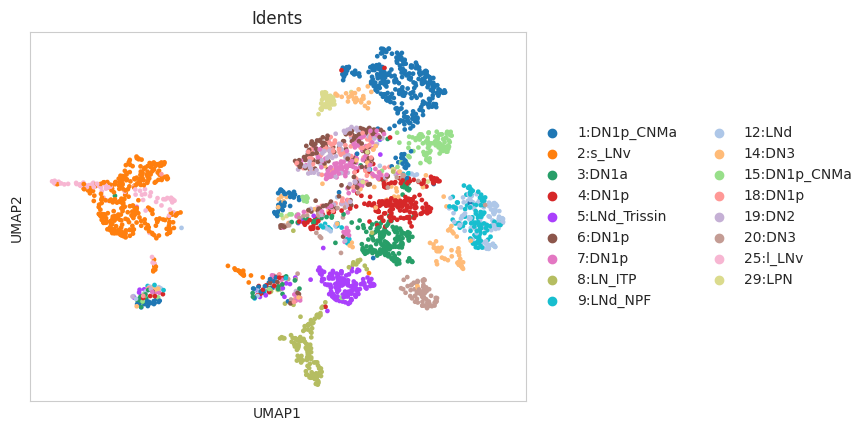

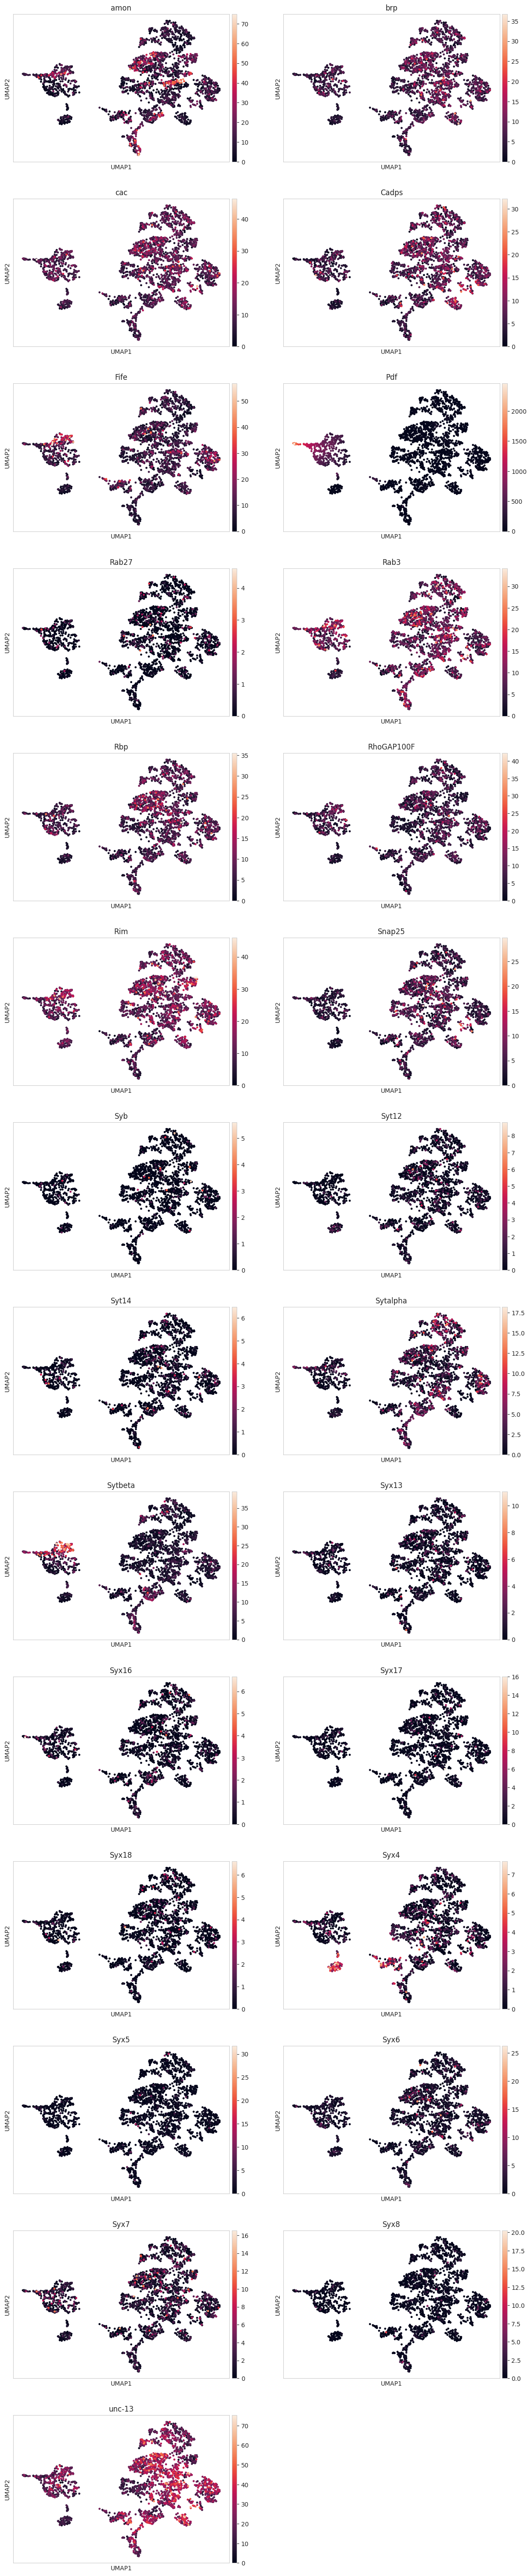

In [6]:
# Perform UMAP clustering method
sc.pp.neighbors(filtered_adata, n_neighbors=10, n_pcs=50)
sc.tl.umap(filtered_adata)

# Plot by cluster
sc.pl.umap(filtered_adata, color='Idents')
sc.pl.umap(filtered_adata, color=genes, ncols=2)

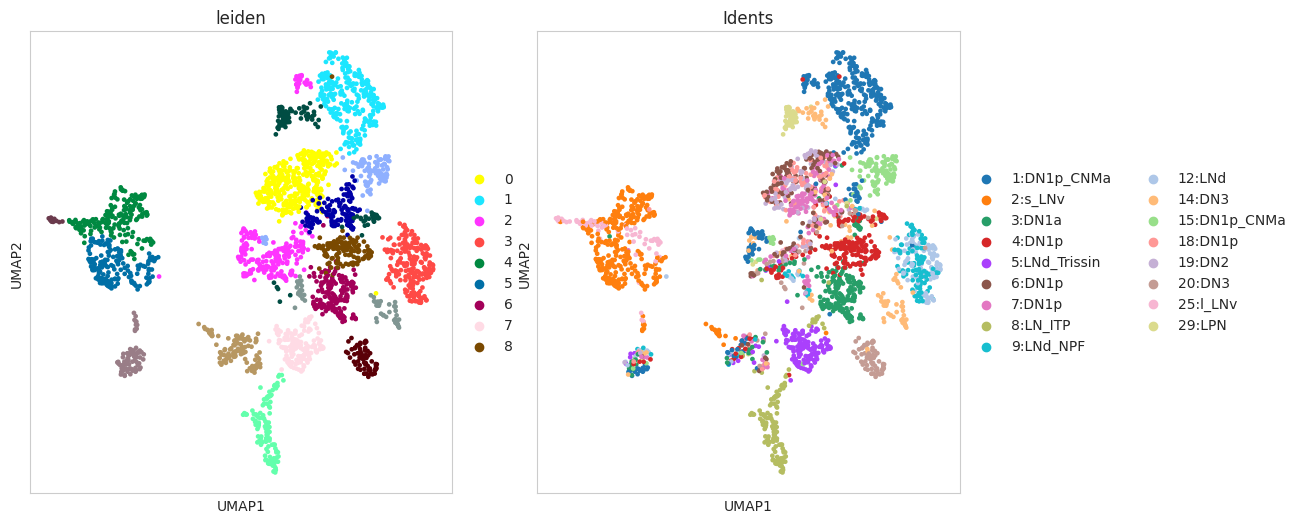

In [21]:
# Perform leiden clustering
sc.tl.leiden(filtered_adata, resolution=0.8)

# Side by side comparison of leiden and Idents
fig, axs = plt.subplots(1, 2, figsize=(12, 6))
sc.pl.umap(filtered_adata, color='Idents', ax=axs[1], show=False)
sc.pl.umap(filtered_adata, color='leiden', ax=axs[0], show=False)
plt.show()

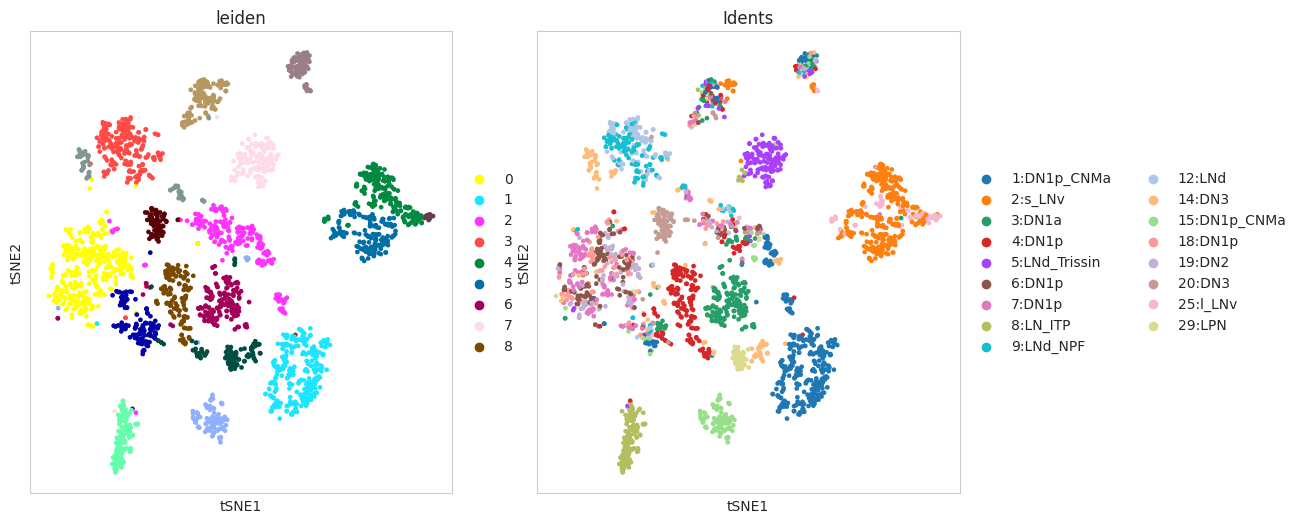

In [22]:
# Same idea but with t-SNE, also side by side
fig, axs = plt.subplots(1, 2, figsize=(12, 6))

sc.pl.tsne(filtered_adata, color='Idents', ax=axs[1], show=False)
sc.pl.tsne(filtered_adata, color='leiden', ax=axs[0], show=False)
plt.show()

In [23]:
# Save the results to the dataset folder as .h5ad
filtered_adata.write_h5ad('../dataset/filtered_adata.h5ad')